<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [237]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [238]:
# two main characteristics:
#     (1)fixed 
#     (2)renovatable
# Fixed features in the data set:
# (i) do some EDA
# (ii) liner regression and others
# (iii) classification

# focus:
#     feature selection
#     simple regression
#     cross validation
#     stats model

# keep changing models 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [239]:
# Load the data
house = pd.read_csv('./housing.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [240]:
house.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [241]:
house.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [242]:
house.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [243]:
house.MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [244]:
house.PoolArea.value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [245]:
house.BsmtUnfSF.value_counts()

0       118
728       9
384       8
572       7
600       7
300       7
440       6
625       6
280       6
672       6
270       6
162       5
108       5
490       5
390       5
80        5
326       5
816       5
698       5
319       5
264       5
216       5
410       5
638       4
768       4
780       4
660       4
420       4
840       4
556       4
       ... 
707       1
705       1
701       1
693       1
721       1
692       1
691       1
690       1
1515      1
680       1
1528      1
717       1
722       1
758       1
739       1
752       1
750       1
1497      1
744       1
741       1
740       1
735       1
724       1
734       1
733       1
731       1
730       1
726       1
725       1
2046      1
Name: BsmtUnfSF, Length: 780, dtype: int64

In [246]:
house.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [247]:
house.FullBath.value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [248]:
house.HalfBath.value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [249]:
house.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [250]:
house.BsmtFullBath.value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [251]:
# Bath = house[["FullBath", "HalfBath", "BsmtHalfBath", "BsmtFullBath",]].copy()
a = house.groupby(house.FullBath)["HalfBath", "BsmtHalfBath", "BsmtFullBath"]

In [252]:
house2 = house[house.MSZoning != 'C (all)']
house2.MSZoning.value_counts()

RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64

In [253]:
house2.FullBath.value_counts()

2    767
1    642
3     33
0      8
Name: FullBath, dtype: int64

In [254]:
house2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 81 columns):
Id               1450 non-null int64
MSSubClass       1450 non-null int64
MSZoning         1450 non-null object
LotFrontage      1191 non-null float64
LotArea          1450 non-null int64
Street           1450 non-null object
Alley            89 non-null object
LotShape         1450 non-null object
LandContour      1450 non-null object
Utilities        1450 non-null object
LotConfig        1450 non-null object
LandSlope        1450 non-null object
Neighborhood     1450 non-null object
Condition1       1450 non-null object
Condition2       1450 non-null object
BldgType         1450 non-null object
HouseStyle       1450 non-null object
OverallQual      1450 non-null int64
OverallCond      1450 non-null int64
YearBuilt        1450 non-null int64
YearRemodAdd     1450 non-null int64
RoofStyle        1450 non-null object
RoofMatl         1450 non-null object
Exterior1st      1450 non-n

In [255]:
house2.BsmtFullBath.value_counts()

0    847
1    587
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [256]:
house2.Alley.value_counts()

Grvl    50
Pave    39
Name: Alley, dtype: int64

In [257]:
house2.LotShape.value_counts()

Reg    916
IR1    483
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [258]:
house2.LandContour.value_counts()

Lvl    1305
Bnk      62
HLS      49
Low      34
Name: LandContour, dtype: int64

In [259]:
house2.BsmtFinType1.value_counts()

Unf    424
GLQ    418
ALQ    220
BLQ    147
Rec    130
LwQ     74
Name: BsmtFinType1, dtype: int64

In [260]:
house2.BsmtFinType2.value_counts()

Unf    1246
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [261]:
# house2[[house2["Utilities"]]=="NoSeWa"]
# house2.groupby["Utilities"]
# house2.loc[house2["Utilities"] == "NoSeWa"]

In [262]:
# house2.iloc[597,:].HalfBath

In [263]:
# Full = house.groupby(house.FullBath)["BsmtFullBath"]
# Full.info() 
house2[house2.FullBath==0].BsmtFullBath

53      2
188     2
375     1
597     0
634     2
1163    2
1213    1
1270    2
Name: BsmtFullBath, dtype: int64

In [264]:
house2["Bathrooms"] = house2['FullBath'] + house2['HalfBath'] + house2['BsmtFullBath'] + house2["BsmtHalfBath"]

/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [265]:
Bsment1=pd.get_dummies(house2.BsmtFinType1, prefix='BsmtFinType1').iloc[:,:-1]
Bsment2=pd.get_dummies(house2.BsmtFinType2, prefix='BsmtFinType2').iloc[:,:-1]

In [266]:
# Bsment = Bsment1.add(Bsment2, fill_value=0)
# Bsment[Bsment.BsmtFinType_BLQ==2] # only one of same quality

In [267]:
# Bse = pd.concat([Bsment1,Bsment2])
# house31 = pd.concat([house2,Bse])

In [268]:
# house2.get_dummies(house2.BsmtFinType2. prefix="BsmtFinType2")

In [269]:
#house2['BsmtFullBath'] + house2["BsmtHalfBath"]
# house3 = house2.drop(['FullBath', 'HalfBath', 'BsmtFullBath', "BsmtHalfBath"], axis=1)
# house3 = house2.drop(house.index[597])

In [270]:
# house3 = house2

In [271]:
# # a = np.house2.SalePrice((rng.normal(size=1000),
# #               rng.normal(loc=5, scale=2, size=1000)))
# dp = house3[["SalePrice"]].copy()
# ax = sns.distplot(dp,fit=None, kde=True)
# ax.set(xlabel='SalePrice', ylabel='Distribution')
# plt.title("Sale price Distribution")

In [272]:
# house3.SalePrice.describe()

In [273]:
# Create brown bars
# plt.bar(nbh, sp, color='#7f6d5f', edgecolor='white', width=barWidth)
# # # Create green bars (middle), on top of the firs ones
# # plt.bar(nbh, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# # Create green bars (top)
# plt.bar(nbh, la, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)

In [274]:
nbh = house2["Neighborhood"]
sp =  house2['SalePrice']
la =  house2['LotArea']
BR =  house2['BedroomAbvGr']

nslb = house2[["Neighborhood", 'SalePrice', 'LotArea', 'BedroomAbvGr' ]].copy()

# plt.figure(figsize=(30,10))
# plt.bar(nbh, sp)
# plt.bar(nbh, la)
# plt.plot(nbh, sp, label ="neighbourhood")                     
                      
# plt.xlabel('sp')
# plt.ylabel('')
# plt.title('Consumption of various drugs by age(without alcohol and marijuana)')
# plt.legend(bbox_to_anchor=(0.1, 0.9), loc=2, borderaxespad=0.)
# plt.show()

In [275]:
sample_mean = sp.mean()
Total = sp.count()
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = sp.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(Total))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  
confidence_interval

spone = sp.quantile(0.025)
sptwo = sp.quantile(0.975)
print spone 
print sptwo

laone = la.quantile(0.025)
latwo = la.quantile(0.975)
print laone 
print latwo

z-critical value:
1.959963984540054
81225.0
384768.25
2293.275
22830.75


Text(0.5,1,u'lot area Distribution')

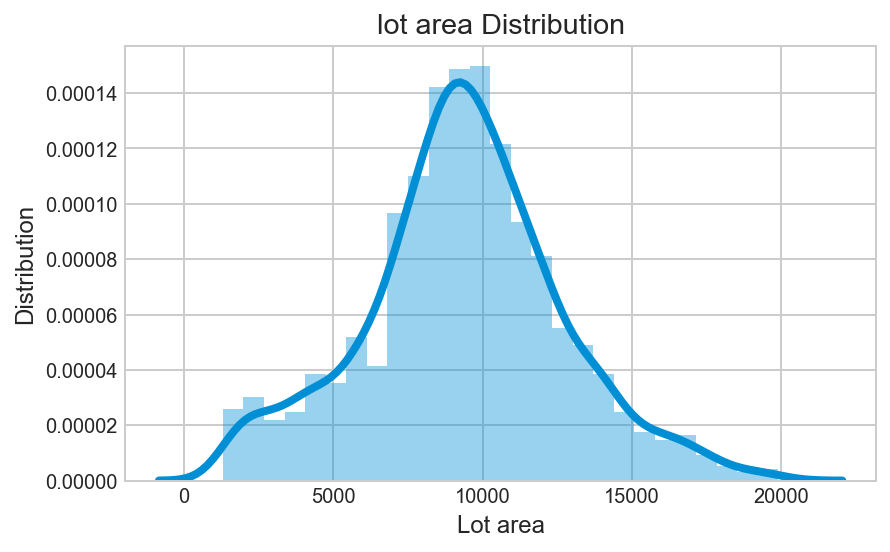

In [276]:
dfla = house2[la <= 20000.0]
dfla2 =  dfla['LotArea']
dp2 = dfla2.copy()
ax = sns.distplot(dp2,fit=None, kde=True)
ax.set(xlabel="Lot area", ylabel='Distribution')
plt.title("lot area Distribution")

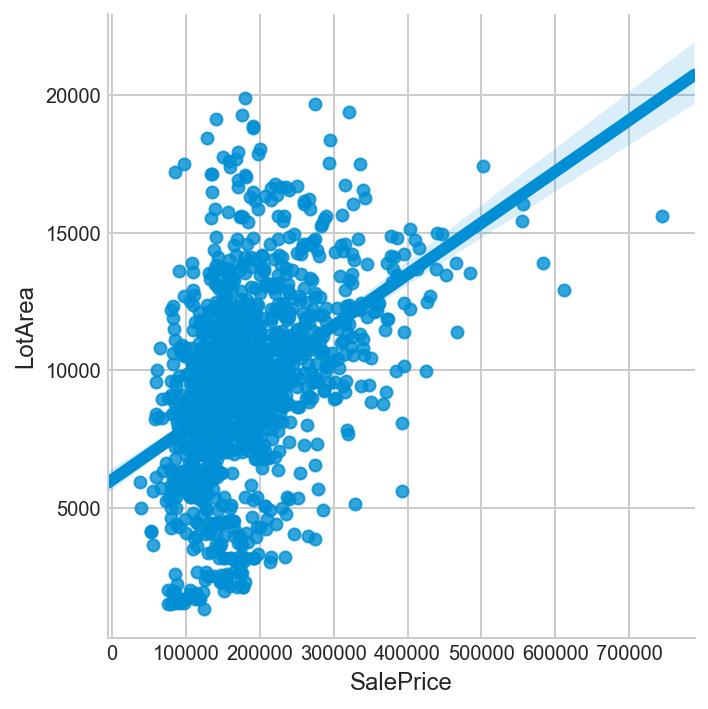

In [277]:
sns.lmplot(y="LotArea", x='SalePrice', data=dfla,fit_reg=True)

sale price 0.25%: 81225.0
sale price 0.975%: 384768.25
land area 0.25%: 2293.275
land area 0.975%: 22830.75


/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


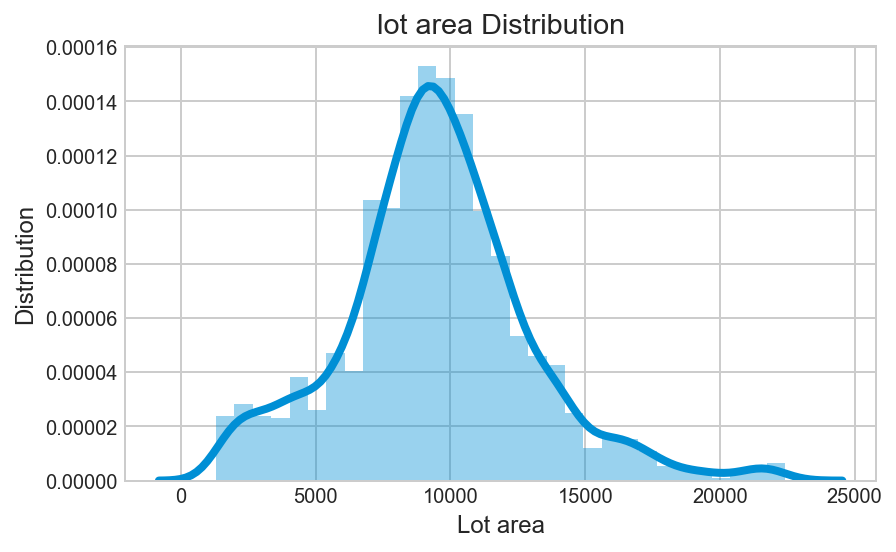

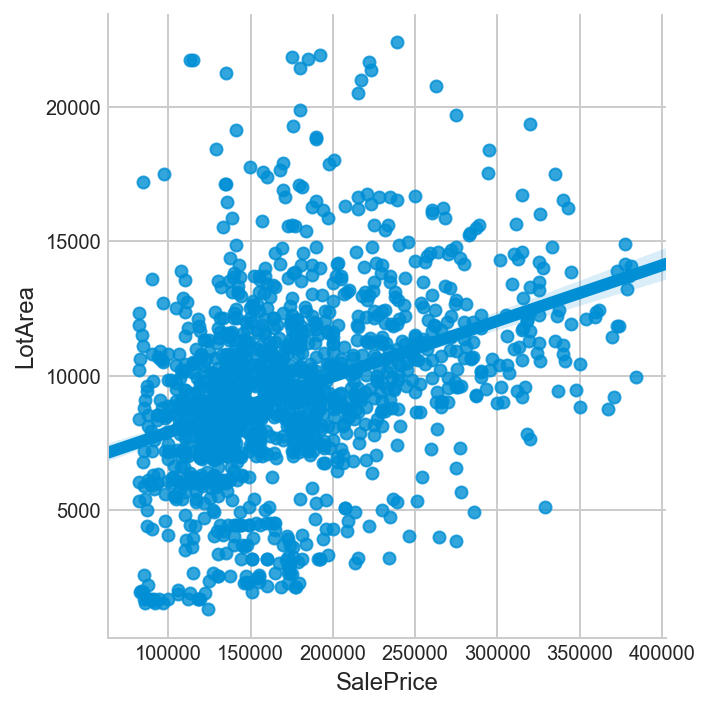

In [278]:
print "sale price 0.25%:", (sp.quantile(0.025)) 
print "sale price 0.975%:", (sp.quantile(0.975))
print "land area 0.25%:", la.quantile(0.025)
print "land area 0.975%:", la.quantile(0.975)
dfla = house2[la >= la.quantile(0.025)]
dfla = house2[la <= la.quantile(0.975)] 
dfla = dfla[sp >= sp.quantile(0.025)]
dflafin = dfla[sp <= sp.quantile(0.975)]
dfla2 =  dflafin['LotArea']
dp2 = dfla2.copy()
ax = sns.distplot(dp2,fit=None, kde=True)
ax.set(xlabel="Lot area", ylabel='Distribution')
plt.title("lot area Distribution")
sns.lmplot(y="LotArea", x='SalePrice', data=dflafin,fit_reg=True)

In [279]:
dflafin.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Bathrooms
count,1344.000000,1344.000000,1106.000000,1344.000000,1344.000000,1344.00000,1344.000000,1344.000000,1338.000000,1344.000000,...,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.00000,1344.000000,1344.000000,1344.000000,1344.000000
mean,731.517113,57.325149,69.037071,9468.670387,6.093006,5.62500,1971.942708,1985.204613,96.718236,425.111607,...,45.764137,20.904762,3.363839,14.912946,1.845982,42.50744,6.350446,2007.802083,176084.308780,2.422619
std,422.804650,42.037718,20.760245,3474.818690,1.250279,1.08087,29.648733,20.286054,164.487988,408.987737,...,63.831651,58.754052,29.134437,55.294492,34.094009,507.26608,2.687765,1.325435,61570.884063,0.885034
min,1.000000,20.000000,21.000000,1300.000000,3.000000,2.00000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,2006.000000,82000.000000,1.000000
25%,361.750000,20.000000,60.000000,7500.000000,5.000000,5.00000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.000000,2007.000000,131300.000000,2.000000
50%,736.500000,50.000000,70.000000,9375.000000,6.000000,5.00000,1974.000000,1994.000000,0.000000,382.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.00000,6.000000,2008.000000,162900.000000,2.000000
75%,1095.250000,70.000000,80.000000,11303.500000,7.000000,6.00000,2000.000000,2004.000000,160.000000,696.250000,...,66.500000,0.000000,0.000000,0.000000,0.000000,0.00000,8.000000,2009.000000,207700.000000,3.000000
max,1460.000000,190.000000,182.000000,22420.000000,10.000000,9.00000,2009.000000,2010.000000,1600.000000,1880.000000,...,547.000000,386.000000,508.000000,480.000000,738.000000,15500.00000,12.000000,2010.000000,383970.000000,6.000000


In [280]:
dflafin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344 entries, 0 to 1459
Data columns (total 82 columns):
Id               1344 non-null int64
MSSubClass       1344 non-null int64
MSZoning         1344 non-null object
LotFrontage      1106 non-null float64
LotArea          1344 non-null int64
Street           1344 non-null object
Alley            84 non-null object
LotShape         1344 non-null object
LandContour      1344 non-null object
Utilities        1344 non-null object
LotConfig        1344 non-null object
LandSlope        1344 non-null object
Neighborhood     1344 non-null object
Condition1       1344 non-null object
Condition2       1344 non-null object
BldgType         1344 non-null object
HouseStyle       1344 non-null object
OverallQual      1344 non-null int64
OverallCond      1344 non-null int64
YearBuilt        1344 non-null int64
YearRemodAdd     1344 non-null int64
RoofStyle        1344 non-null object
RoofMatl         1344 non-null object
Exterior1st      1344 non-n

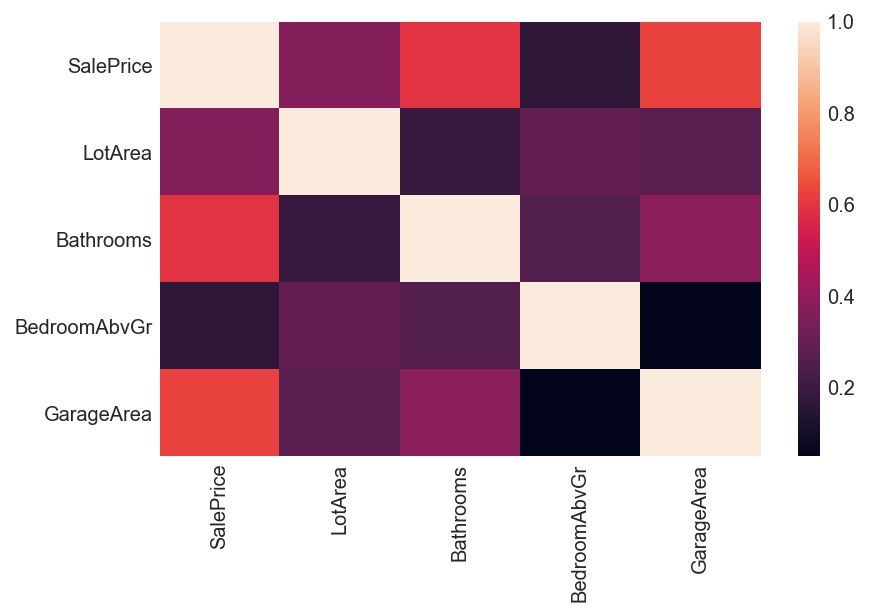

In [281]:
nbh2 = dflafin["Neighborhood"]
sp2 = dflafin['SalePrice']
la2 = dflafin['LotArea']
ba2 = dflafin['Bathrooms']
be = dflafin['BedroomAbvGr']
ga = dflafin['GarageArea']

# BsmtFinType1_ALQ    4350 non-null float64
# BsmtFinType1_BLQ    4350 non-null float64
# BsmtFinType1_GLQ    4350 non-null float64
# BsmtFinType1_LwQ    4350 non-null float64
# BsmtFinType1_Rec    4350 non-null float64

nsplbb = dflafin[["Neighborhood", 'SalePrice', 'LotArea', 'Bathrooms', 'BedroomAbvGr','GarageArea']]
# plt.matshow(dflafin.corr(), xticklabels=dflafin.columns.values, yticklabels=dflafin.columns.values )

import seaborn as sns
corr = nsplbb.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# # Create a figure instance
# fig = plt.figure(1, figsize=(9, 6))

# # Create an axes instance
# ax = fig.add_subplot(111)
# bx = fig.add_subplot(111)
# # Create the boxplot
# bp = ax.boxplot(sp2)
# bp2 = bx.boxplot(la2)
# # bp3 = ax.boxplot(ba2)

In [282]:
ne = dflafin.groupby(dflafin.Neighborhood)
sane = dflafin.groupby(dflafin.Neighborhood)['SalePrice'].mean()
sqne = dflafin.groupby(dflafin.Neighborhood)['LotArea'].mean()
bane = dflafin.groupby(dflafin.Neighborhood)['Bathrooms'].mean()
gane = dflafin.groupby(dflafin.Neighborhood)['GarageArea'].mean()
bene = dflafin.groupby(dflafin.Neighborhood)['BedroomAbvGr'].mean()

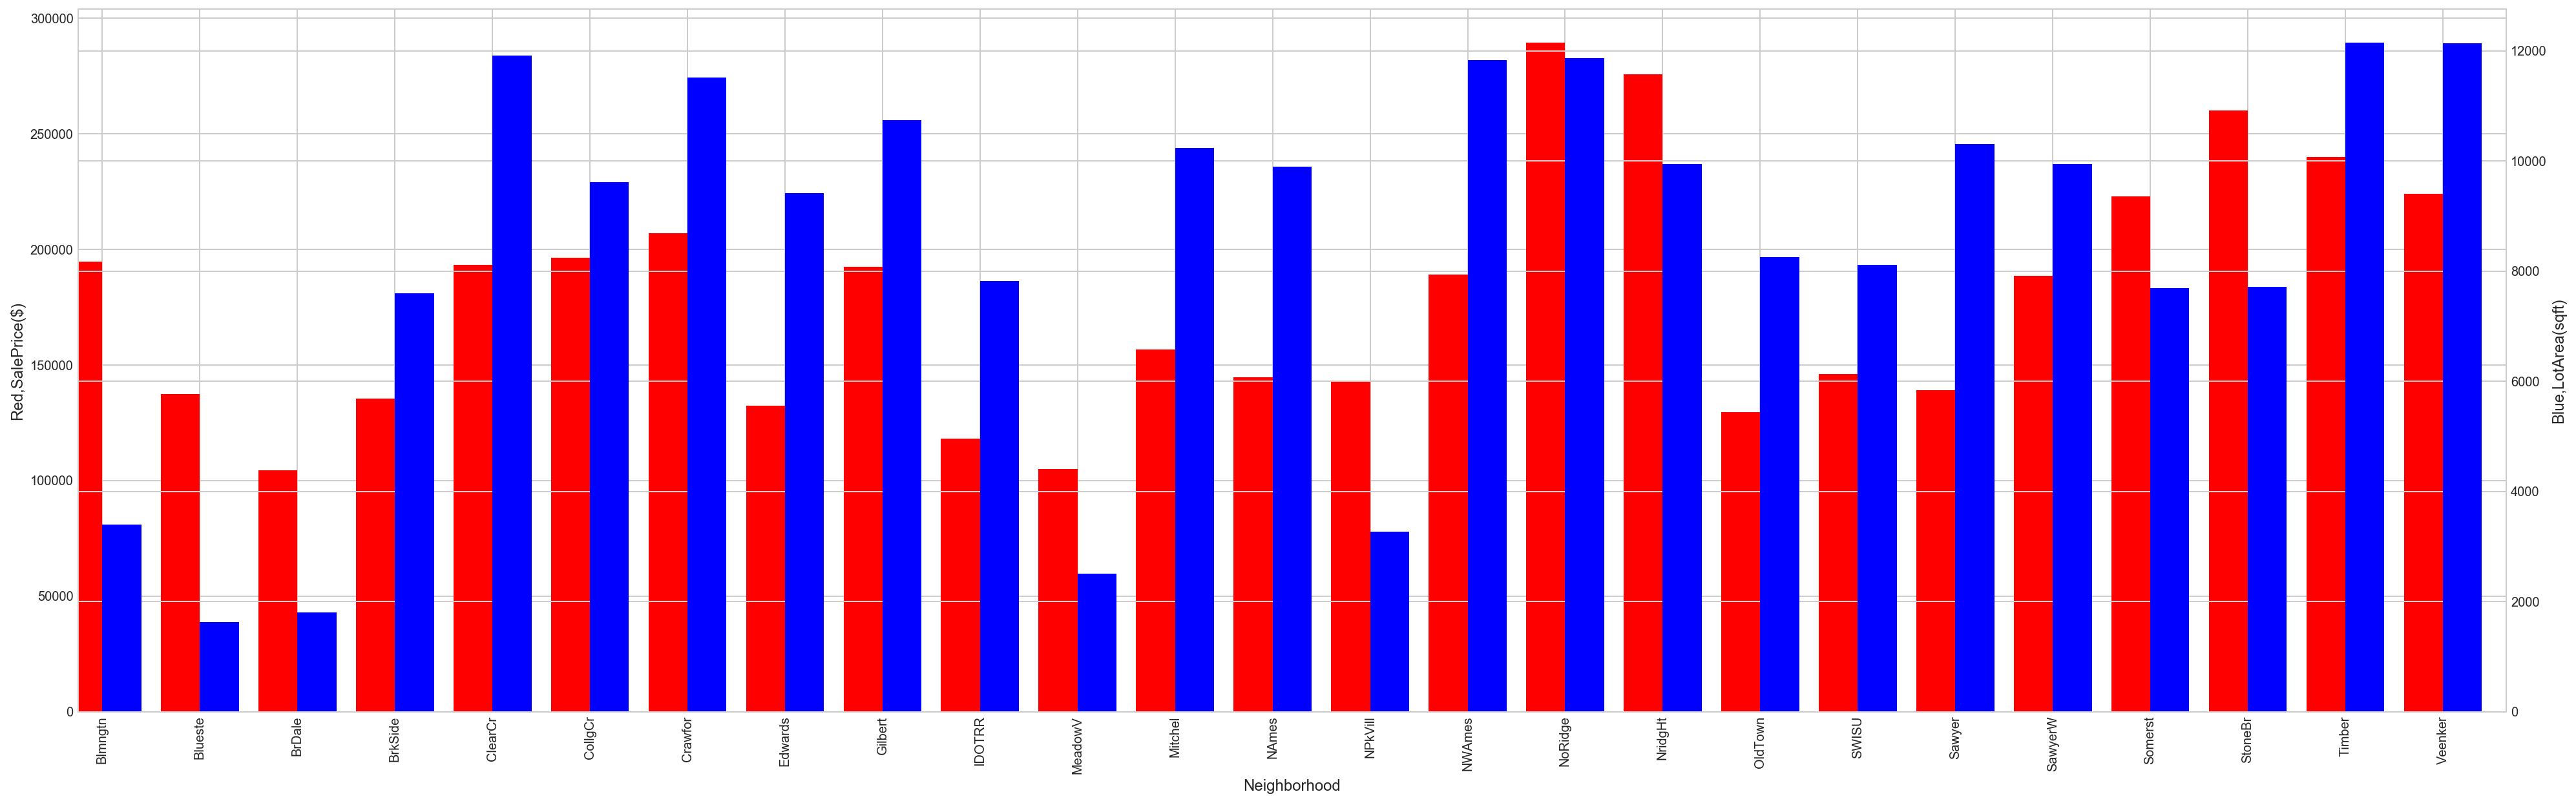

In [283]:
# plt.figure(figsize=(30,10))  # Create matplotlib figure
fig = plt.figure(figsize=(30,10)) 
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
sane.plot(kind='bar', color='red', ax=ax, width=width, position=1)
sqne.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
ax.set_ylabel('Red,SalePrice($)')
ax2.set_ylabel('Blue,LotArea(sqft)')
plt.show()

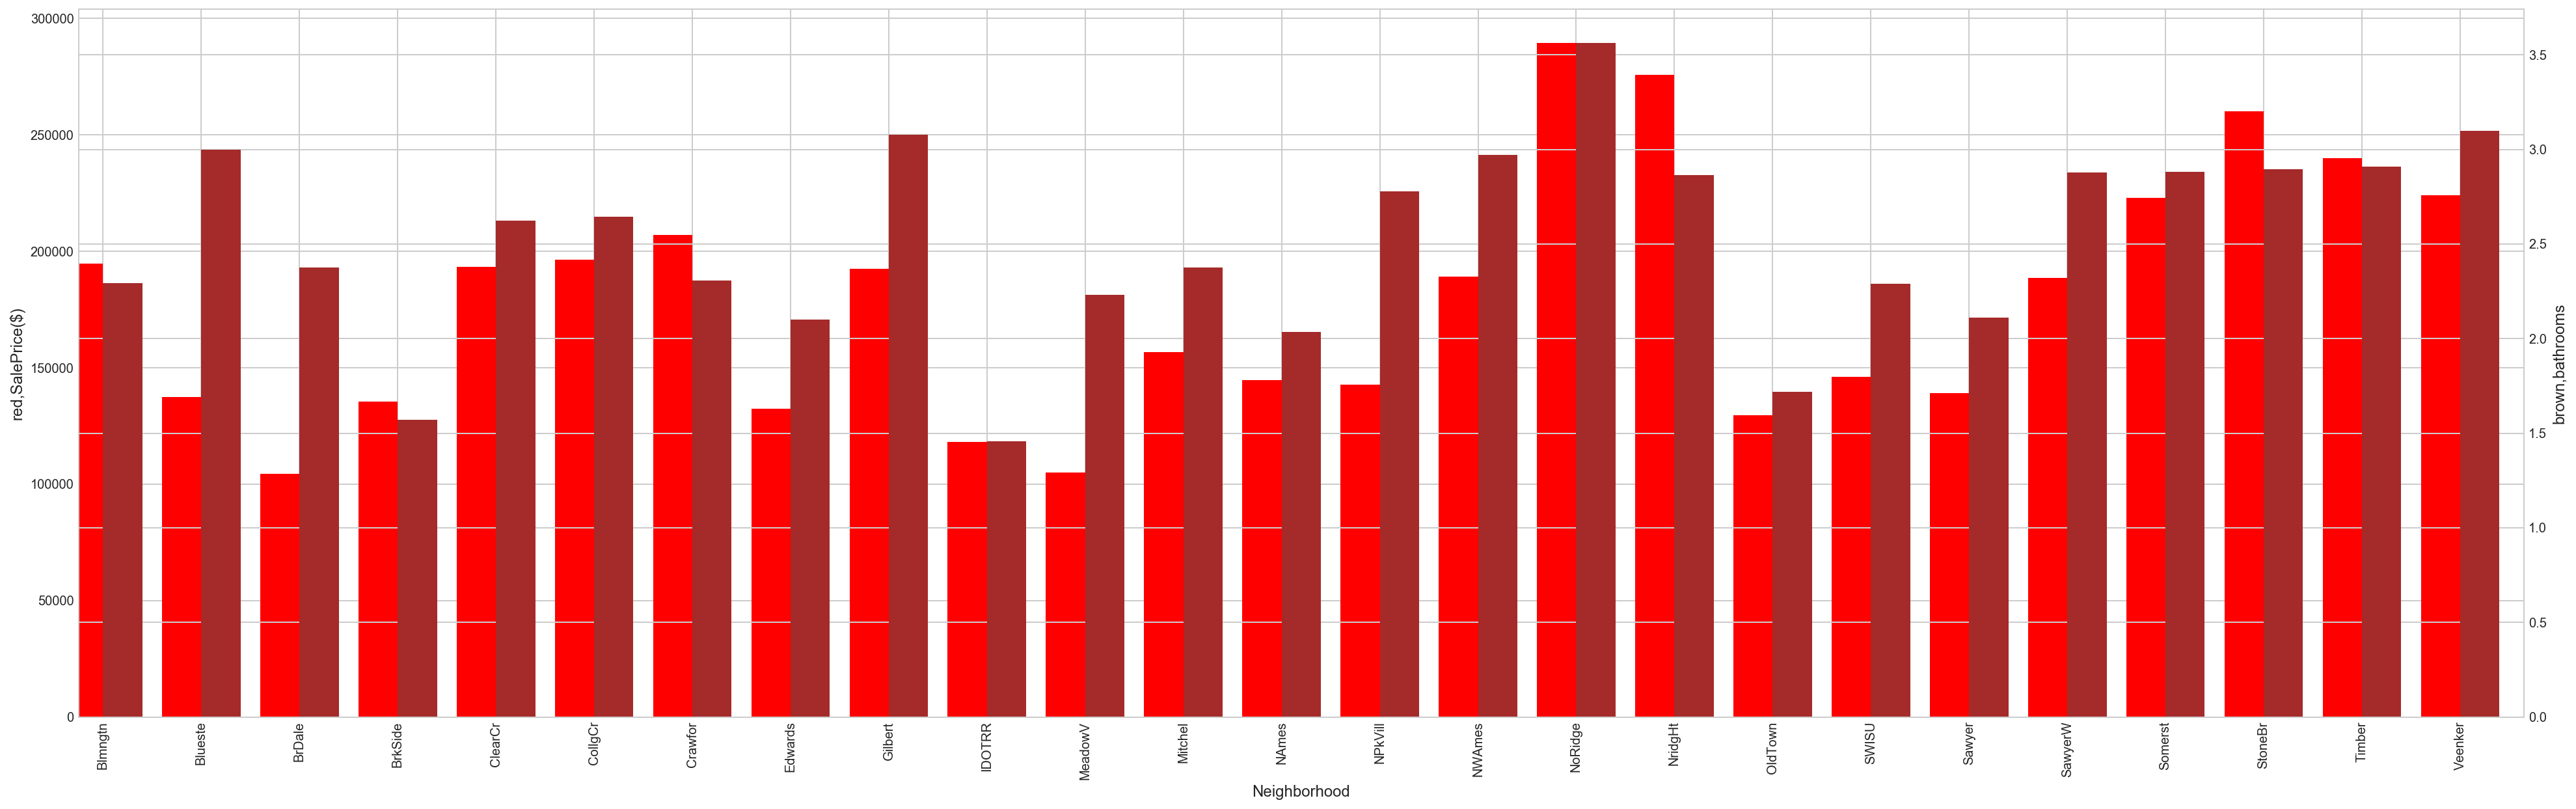

In [284]:
# plt.figure(figsize=(30,10))  # Create matplotlib figure
fig = plt.figure(figsize=(30,10)) 
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
sane.plot(kind='bar', color='red', ax=ax, width=width, position=1)
bane.plot(kind='bar', color='brown', ax=ax2, width=width, position=0)
ax.set_ylabel('red,SalePrice($)')
ax2.set_ylabel('brown,bathrooms')
plt.show()

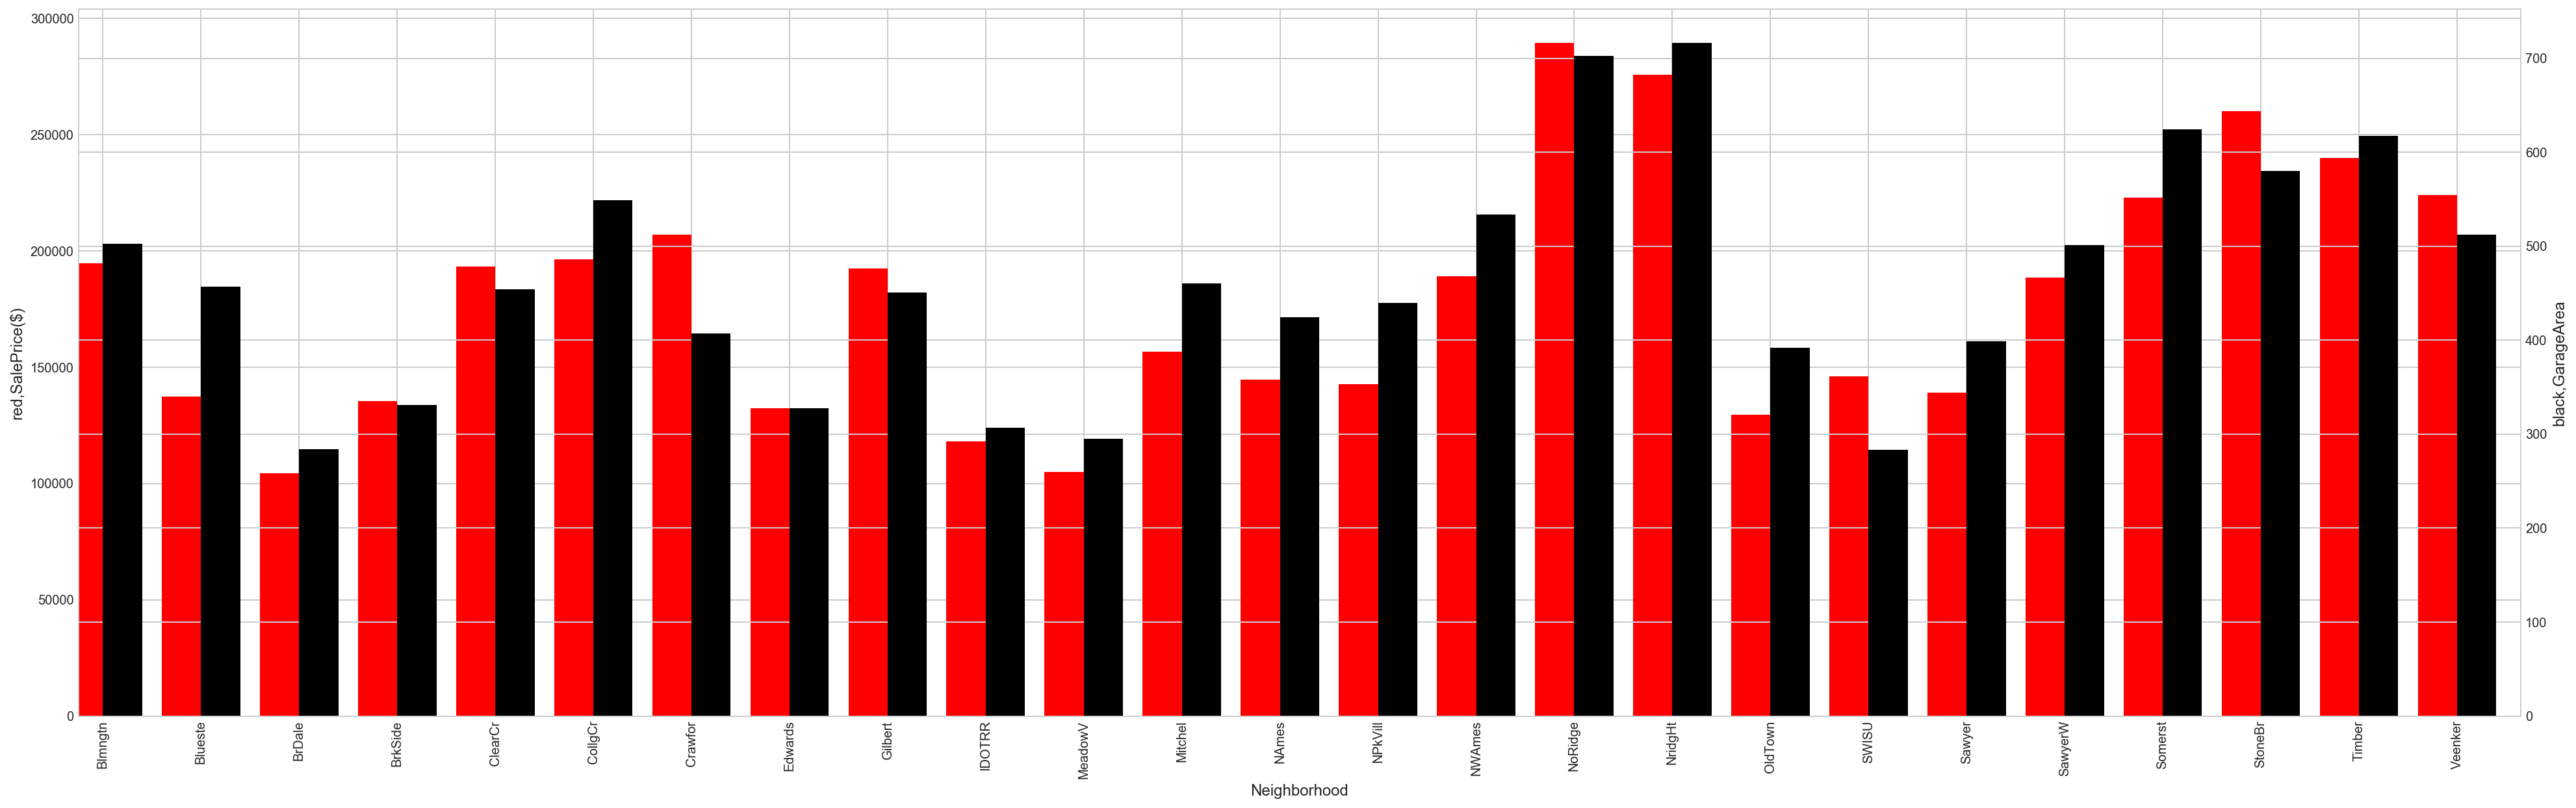

In [285]:
fig = plt.figure(figsize=(30,10)) 
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
sane.plot(kind='bar', color='red', ax=ax, width=width, position=1)
gane.plot(kind='bar', color='black', ax=ax2, width=width, position=0)
ax.set_ylabel('red,SalePrice($)')
ax2.set_ylabel('black,GarageArea')
plt.show()

In [286]:
#Theres a relationship between lot area and sales price


In [287]:
# aldum = pd.get_dummies(dflafin["Alley"],prefix=['Alley'])
# ladum = pd.get_dummies(dflafin["LandContour"],prefix=["LandContour"], drop_first=True)
# msdum = pd.get_dummies(dflafin["MSZoning"],prefix=["MSZoning"], drop_first=True)
# msdum = pd.get_dummies(dflafin["LotShape"],prefix=["LotShape"], drop_first=True)
# utdum = pd.get_dummies(dflafin["Utilities"],prefix=["Utilities"], drop_first=True)
# lcdum = pd.get_dummies(dflafin["LotConfig"],prefix=["LotConfig"], drop_first=True)
# lsdum = pd.get_dummies(dflafin["LandSlope"],prefix=["LandSlope"], drop_first=True)
# nedum = pd.get_dummies(dflafin["Neighbourhood"],prefix=["LandSlope"], drop_first=True)


In [288]:
# plt.subplots(figsize=(100,75))
# corr = dflafin.corr()
# sns.heatmap(corr, 
#             xticklabels=dflafin.columns.values,
#             yticklabels=dflafin.columns.values)

In [289]:
# dfla = house2[la <= 20000.0]
# dfla2 =  dfla['LotArea']
# dp2 = dfla2.copy()
# ax = sns.distplot(dp2,fit=None, kde=True)
# ax.set(xlabel="Lot area", ylabel='Distribution')
# plt.title("lot area Distribution")

In [290]:
# spp = house2[['SalePrice', "LotArea", "Neighborhood", ]].copy()
# RMV = sns.pairplot(spp) # (kind=reg)
# RMV

In [291]:

# ba2 = house2['Bathrooms']
# nbh = house2["Neighborhood"]
# sp =  house2['SalePrice']
# la =  house2['LotArea']
# BR =  house2['BedroomAbvGr']
# ga = house2['GarageArea']

# nslb = house2[['FullBath', 'HalfBath', 'BsmtFullBath', "BsmtHalfBath", 'Bathrooms', 'SalePrice', 'LotArea', 'BedroomAbvGr','GarageArea', 'YrSold']].copy()

# # house2['FullBath'] + house2['HalfBath'] + house2['BsmtFullBath'] + house2["BsmtHalfBath"]

# Bsment1=pd.get_dummies(house2.BsmtFinType1, prefix='BsmtFinType1').iloc[:,:-1]
# Bsment2=pd.get_dummies(house2.BsmtFinType2, prefix='BsmtFinType2').iloc[:,:-1]
# # Bse = pd.concat([Bsment1,Bsment2])
# nbh1=pd.get_dummies(house2.Neighborhood, prefix='nhd').iloc[:,:-1]
# Bsment1.reset_index(drop=True, inplace=True)
# Bsment2.reset_index(drop=True, inplace=True)
# nslb.reset_index(drop=True, inplace=True)
# Bse.reset_index(drop=True, inplace=True)
# nbh1.reset_index(drop=True, inplace=True)
# house3 = pd.concat([nslb,nbh1,Bsment1,Bsment2],axis=1)
# house3.fillna(0)
# house3.head()

In [292]:
# house3 = house2[['FullBath', 'HalfBath', 'BsmtFullBath', "BsmtHalfBath", 'SalePrice', 'LotArea', 'BedroomAbvGr','GarageArea', 'GrLivArea', 'RoofMatl_ClyTile', 'OverallQual', 'BsmtQual_Ex', 'Condition2_PosN', 'Neighborhood_NoRidge', 'TotalBsmtSF', 'KitchenQual_Ex', 'YearBuilt', 'BsmtFinSF1']].copy()

In [293]:
house2.reset_index(drop=True, inplace=True)
target = house2[["YrSold","SalePrice"]].copy()
predictor = house2.drop("SalePrice", axis=1)
cat_f =[i for i in predictor.columns.values if predictor[i].dtype == "object"]
num_f=[i for i in predictor.columns.values if predictor[i].dtype != "object"]
for cat in cat_f:
    one_hot = pd.get_dummies(predictor[cat], prefix=cat)
    predictor = predictor.drop(cat, axis=1)
    predictor = pd.concat([predictor, one_hot], axis =1)

predictor = predictor.fillna(-1)

for num in num_f:
    predictor.fillna(0)

from sklearn.model_selection import train_test_split
X_test = predictor.loc[predictor['YrSold'] == 2010] 
X_train = predictor.loc[predictor['YrSold'] != 2010]
y_ptest = target.loc[target['YrSold'] == 2010]
y_ptrain = target.loc[target['YrSold'] != 2010]

y_test = y_ptest.SalePrice
y_train = y_ptrain.SalePrice

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_2 = sc.fit_transform(X_train)
X_test_2 = sc.transform(X_test)

In [294]:
#linerar regression
linreg = LinearRegression()

linreg_scores = cross_val_score(linreg, X_train_2, y_train, cv=10)

print (linreg_scores)
print (np.mean(linreg_scores))

[-7.88064911e+25 -5.94764777e+25 -2.44516527e+25 -5.75461455e+24
 -2.05789203e+25 -3.27029522e+25 -3.03635918e+25  8.72917177e-01
 -1.38202003e+22 -7.39041329e+19]
-2.5214859435671185e+25


In [295]:
linreg.fit(X_train_2,y_train)
pred = linreg.predict(X_test_2)
#mean squared error
mse = np.mean((pred - y_test)**2)
mse

7.952328247076331e+32

In [296]:
# calculating linear regression coefficients
linregcoeff = pd.DataFrame({'variable':X_test.columns,
                            'coef':linreg.coef_,
                            'abs_coef':np.abs(linreg.coef_)})

linregcoeff.sort_values('abs_coef', inplace=True, ascending=False)

In [297]:
#linear regression score
linreg.score(X_test_2,y_test)

-1.2508776182271315e+23

In [298]:
# The mean R^2 is extremely positive. All of the R^2 scores are positive in cross-validation.
# The linear regression is performing far worse than the baseline on the testing sets.
# It's probably dramatically overfitting, and the redundant variables are affecting
# the coefficients in unusual ways.

In [299]:
#Ridge Regression
ridge_alphas = np.logspace(0, 5, 200)

ridgeReg = RidgeCV(alphas=ridge_alphas, cv=10)
ridgeReg.fit(X_train_2, y_train)
pred_ridge = ridgeReg.predict(X_test_2)
#mean squared error
mse = np.mean((pred_ridge - y_test)**2)
rescore = ridgeReg.score(X_test_2,y_test)
print rescore
print mse
print (ridgeReg.alpha_)

0.8908016624041787
694217413.3931528
731.68071434272


In [300]:
# calculating ridge regression coefficients
ridgeRegcoeff = pd.DataFrame({'variable':X_test.columns,
                            'coef':ridgeReg.coef_,
                            'abs_coef':np.abs(ridgeReg.coef_)})

ridgeRegcoeff.sort_values('abs_coef', inplace=True, ascending=False)

In [301]:
# ridge = Ridge(alpha=optimal_ridge.alpha_)

# ridge_scores = cross_val_score(ridge, X_train_2, y_train, cv=10)

# print ridge_scores
# print np.mean(ridge_scores)

In [302]:
#LASSO
lalpha = LassoCV(n_alphas=500,cv=10, verbose=1)
lalpha.fit(X_train_2, y_train)
lasso = Lasso(alpha=lalpha.alpha_)
lasso_scores = cross_val_score(lasso, X_train_2, y_train, cv=10)
pred_lasso = lalpha.predict(X_test_2)
#mean squared error for lasso
mse_lasso = np.mean((pred_lasso - y_test)**2)
las_score = lalpha.score(X_test_2,y_test)
print las_score
print np.mean(lasso_scores)
print mse_lasso
# lasscore = lasso_scores.score(X_test_2,y_test)
# print lasscore

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.9051623689875011
0.8348099890683327
602920670.2534146


In [303]:
# calculating lasso regression coefficients
lassocoeff = pd.DataFrame({'variable':X_test.columns,
                            'coef':lalpha.coef_,
                            'abs_coef':np.abs(lalpha.coef_)})

lassocoeff.sort_values('abs_coef', inplace=True, ascending=False)
lassocoeff.head(20)

,abs_coef,coef,variable
16,25465.755484,25465.755484,GrLivArea
125,13915.046369,-13915.046369,RoofMatl_ClyTile
4,13025.037068,13025.037068,OverallQual
183,7151.907941,7151.907941,BsmtQual_Ex
102,6549.322874,-6549.322874,Condition2_PosN
79,6395.743706,6395.743706,Neighborhood_NoRidge
12,5681.854258,5681.854258,TotalBsmtSF
225,5675.747086,5675.747086,KitchenQual_Ex
6,5517.122059,5517.122059,YearBuilt
9,5442.939015,5442.939015,BsmtFinSF1


In [304]:
l1_ratios = np.linspace(0.01, 1.0, 25)

ecnet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,verbose=1)

ecnet.fit(X_train_2, y_train)

print ecnet.alpha_
print ecnet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

1346.0802195934978
1.0


In [305]:
ecnet_score = ecnet.score(X_test_2,y_test)

In [306]:
pred_ecnet = ecnet.predict(X_test_2)
#mean squared error
mse_ecnet = np.mean((pred_ecnet - y_test)**2)
print mse_ecnet
print ecnet_score

605625744.6514281
0.9047368688176158


In [307]:
ecnetocoeff = pd.DataFrame({'variable':X_test.columns,
                            'coef':ecnet.coef_,
                            'abs_coef':np.abs(ecnet.coef_)})

ecnetocoeff.sort_values('abs_coef', inplace=True, ascending=False)
ecnetocoeff.head(20)

,abs_coef,coef,variable
16,25397.944282,25397.944282,GrLivArea
125,13854.014830,-13854.014830,RoofMatl_ClyTile
4,13128.039378,13128.039378,OverallQual
183,7158.902133,7158.902133,BsmtQual_Ex
102,6505.983043,-6505.983043,Condition2_PosN
79,6376.568404,6376.568404,Neighborhood_NoRidge
12,5667.380353,5667.380353,TotalBsmtSF
225,5665.556009,5665.556009,KitchenQual_Ex
6,5482.074999,5482.074999,YearBuilt
9,5419.809369,5419.809369,BsmtFinSF1


In [308]:
print mse_ecnet
print ecnet_score

605625744.6514281
0.9047368688176158


In [309]:
#lasso scores
print np.mean(lasso_scores)
print mse_lasso

0.8348099890683327
602920670.2534146


In [310]:
#ridge
print rescore
print mse
print (ridgeReg.alpha_)

0.8908016624041787
694217413.3931528
731.68071434272


In [320]:
#chose lasso and the following features 
#top 10 + features recommended
house3 = house2[['FullBath', 'HalfBath', 'BsmtFullBath', "BsmtHalfBath", 'SalePrice', 'LotArea', 'BedroomAbvGr','GarageArea', 
               'GrLivArea',
               'RoofMatl',
               'OverallQual',
               'BsmtQual',
               'Condition2',
               'Neighborhood',
               'TotalBsmtSF',
               'KitchenQual',
               'YearBuilt',
               'BsmtFinSF1',
               "YrSold",
               ]].copy()

In [322]:
# selected features testing(doing lasso just selected features)
house3.reset_index(drop=True, inplace=True)
target = house3[["YrSold","SalePrice"]].copy()
predictor = house3.drop("SalePrice", axis=1)
cat_f =[i for i in predictor.columns.values if predictor[i].dtype == "object"]
num_f=[i for i in predictor.columns.values if predictor[i].dtype != "object"]
for cat in cat_f:
    one_hot = pd.get_dummies(predictor[cat], prefix=cat)
    predictor = predictor.drop(cat, axis=1)
    predictor = pd.concat([predictor, one_hot], axis =1)

predictor = predictor.fillna(-1)

for num in num_f:
    predictor.fillna(0)

from sklearn.model_selection import train_test_split
X_test = predictor.loc[predictor['YrSold'] == 2010] 
X_train = predictor.loc[predictor['YrSold'] != 2010]
y_ptest = target.loc[target['YrSold'] == 2010]
y_ptrain = target.loc[target['YrSold'] != 2010]


y_test = y_ptest.SalePrice
y_train = y_ptrain.SalePrice

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_2 = sc.fit_transform(X_train)
X_test_2 = sc.transform(X_test)

#LASSO
lalpha = LassoCV(n_alphas=500,cv=10, verbose=1)
lalpha.fit(X_train_2, y_train)
lasso = Lasso(alpha=lalpha.alpha_)
lasso_scores = cross_val_score(lasso, X_train_2, y_train, cv=10)
#predicting selected feature results
pred_lasso = lalpha.predict(X_test_2)
#mean squared error for lasso
mse_lasso = np.mean((pred_lasso - y_test)**2)
las_score = lalpha.score(X_test_2,y_test)
print las_score
print np.mean(lasso_scores)
print mse_lasso
# lasscore = lasso_scores.score(X_test_2,y_test)
# print lasscore

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.8704276119550575
0.8122241468842739
823743383.4265261


.......[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.0s finished


In [311]:
# calculating lasso regression coefficients for selected features
lassocoeff_2 = pd.DataFrame({'variable':X_test.columns,
                            'coef':lalpha.coef_,
                            'abs_coef':np.abs(lalpha.coef_)})

lassocoeff_2.sort_values('abs_coef', inplace=True, ascending=False)
lassocoeff_2.head(20)

,abs_coef,coef,variable
16,25465.755484,25465.755484,GrLivArea
125,13915.046369,-13915.046369,RoofMatl_ClyTile
4,13025.037068,13025.037068,OverallQual
183,7151.907941,7151.907941,BsmtQual_Ex
102,6549.322874,-6549.322874,Condition2_PosN
79,6395.743706,6395.743706,Neighborhood_NoRidge
12,5681.854258,5681.854258,TotalBsmtSF
225,5675.747086,5675.747086,KitchenQual_Ex
6,5517.122059,5517.122059,YearBuilt
9,5442.939015,5442.939015,BsmtFinSF1


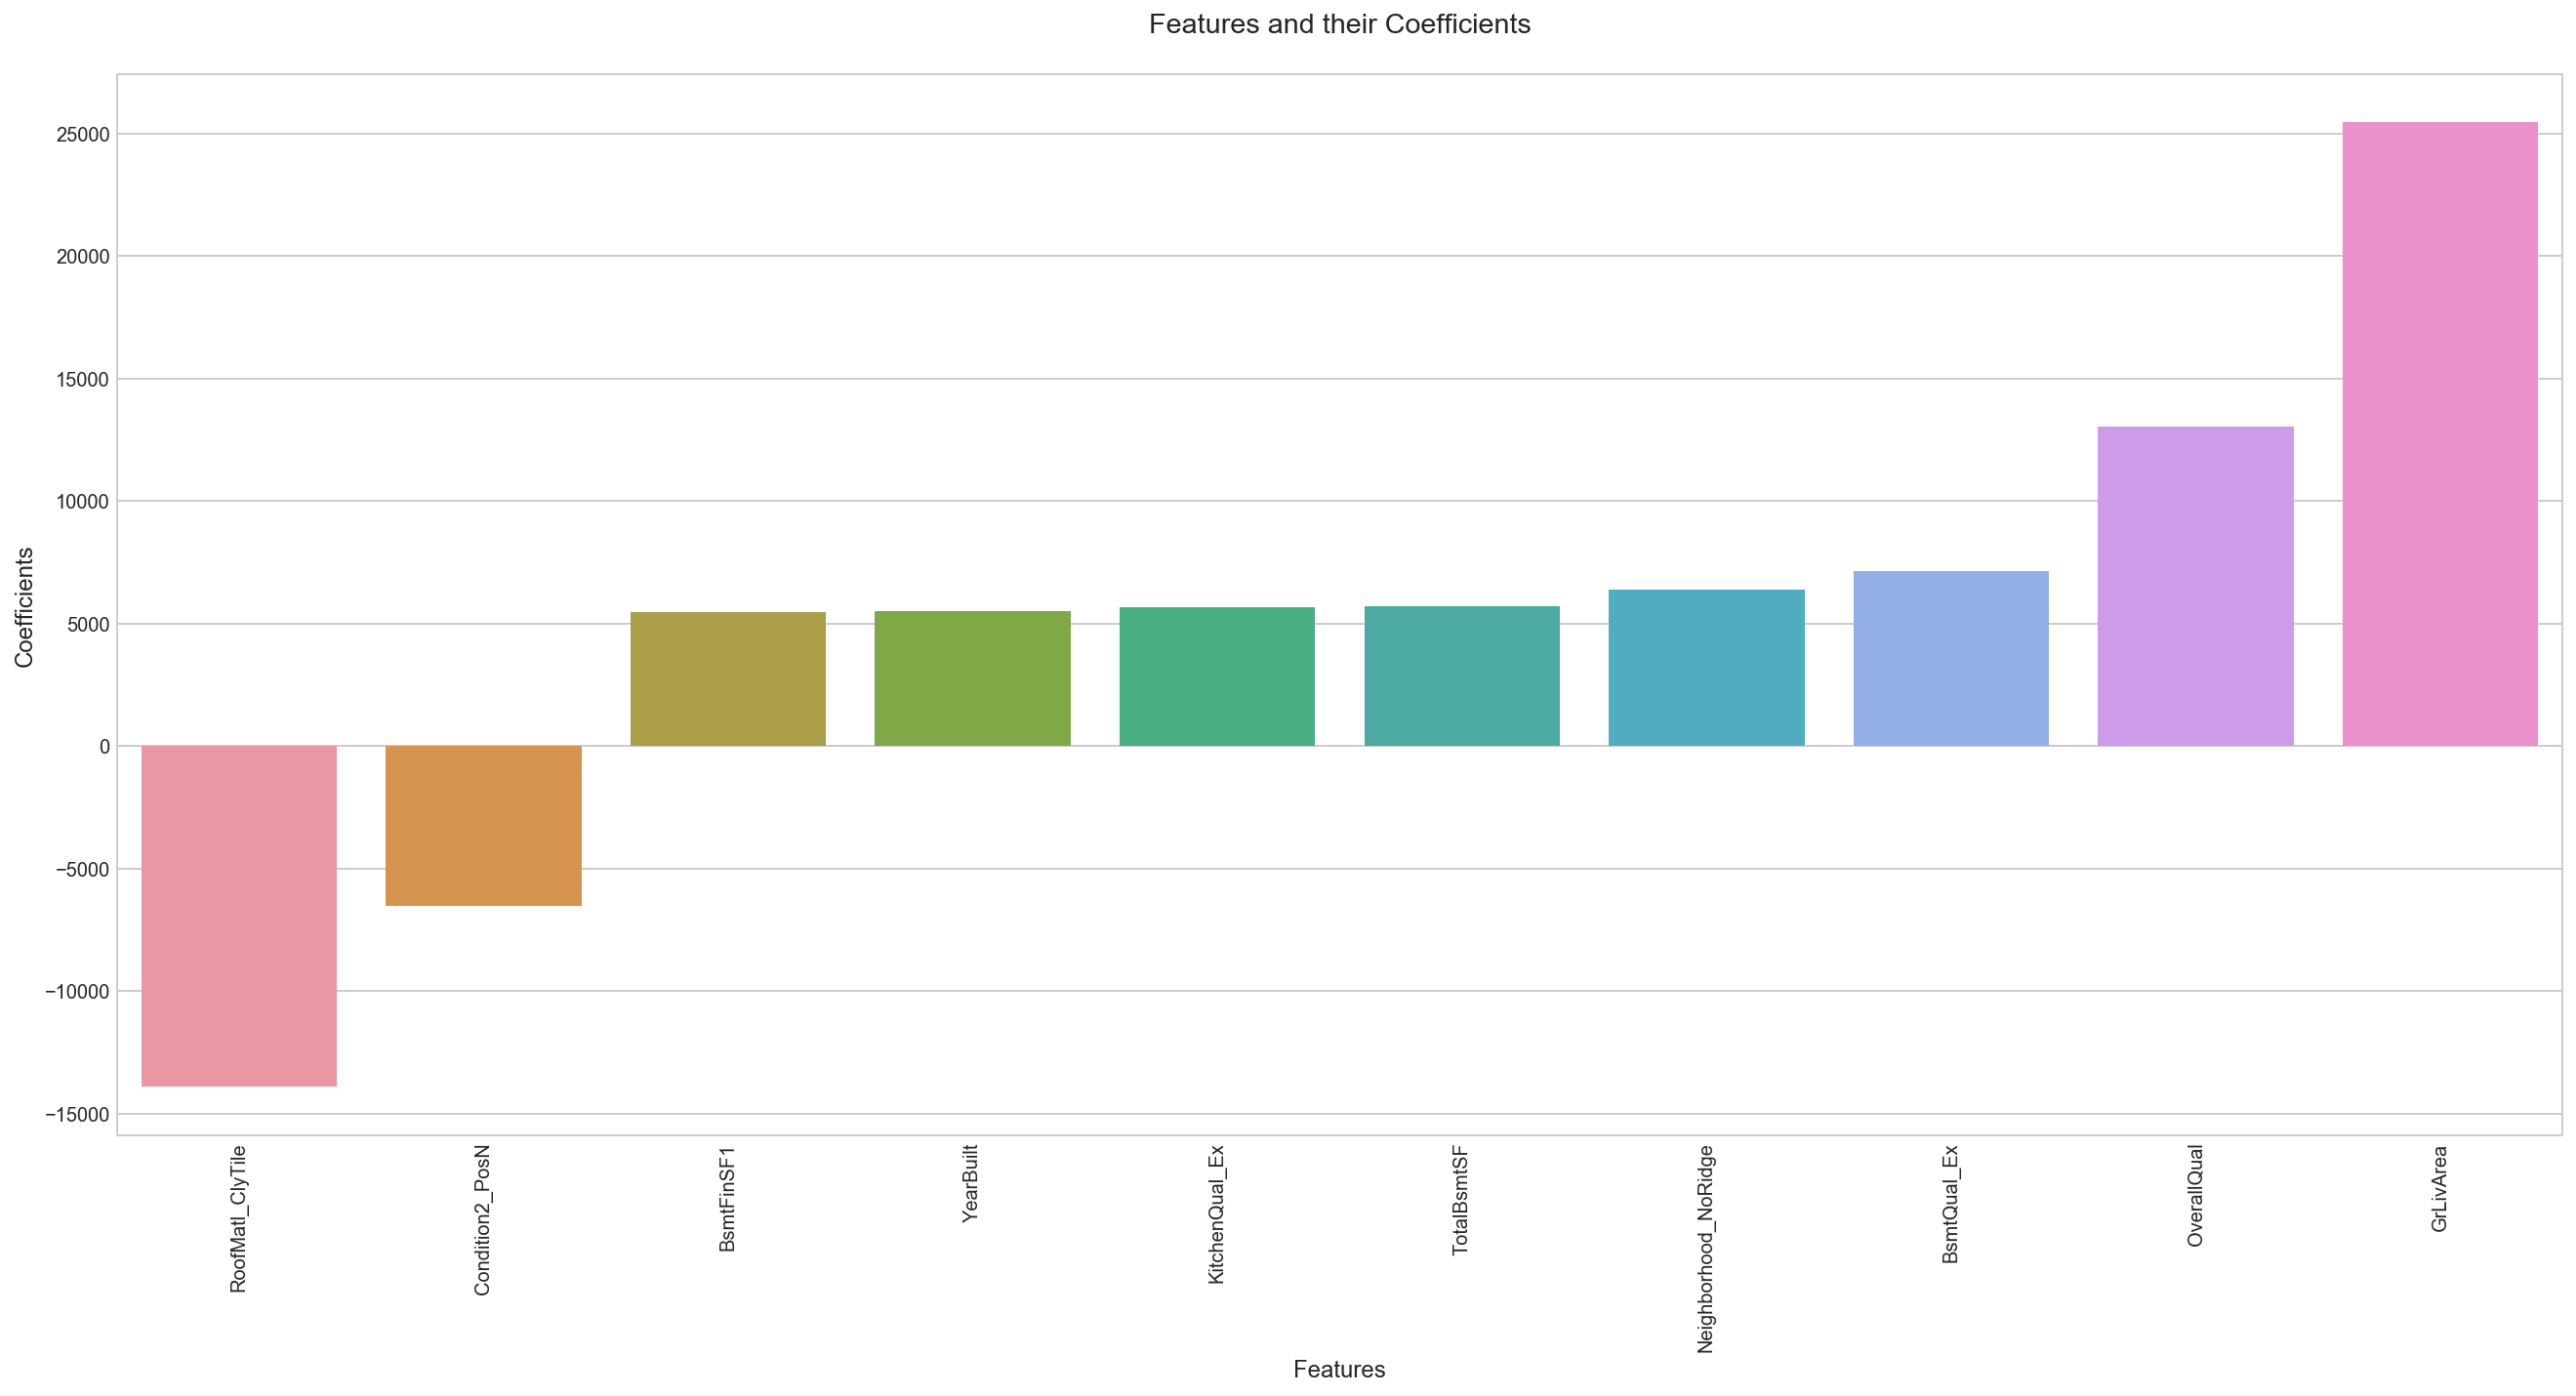

In [319]:
plt.figure(figsize=(20,10))

# Taking only top 10 features
sns.barplot(data=lassocoeff_2[(lassocoeff_2['abs_coef']!=0) &
                              (lassocoeff_2['abs_coef']>5000)].sort_values(by='coef', ascending=True), x='variable', y='coef')

plt.title('Features and their Coefficients\n')
plt.ylabel('Coefficients')
plt.xlabel('Features')
plt.xticks(rotation='vertical')
plt.show()

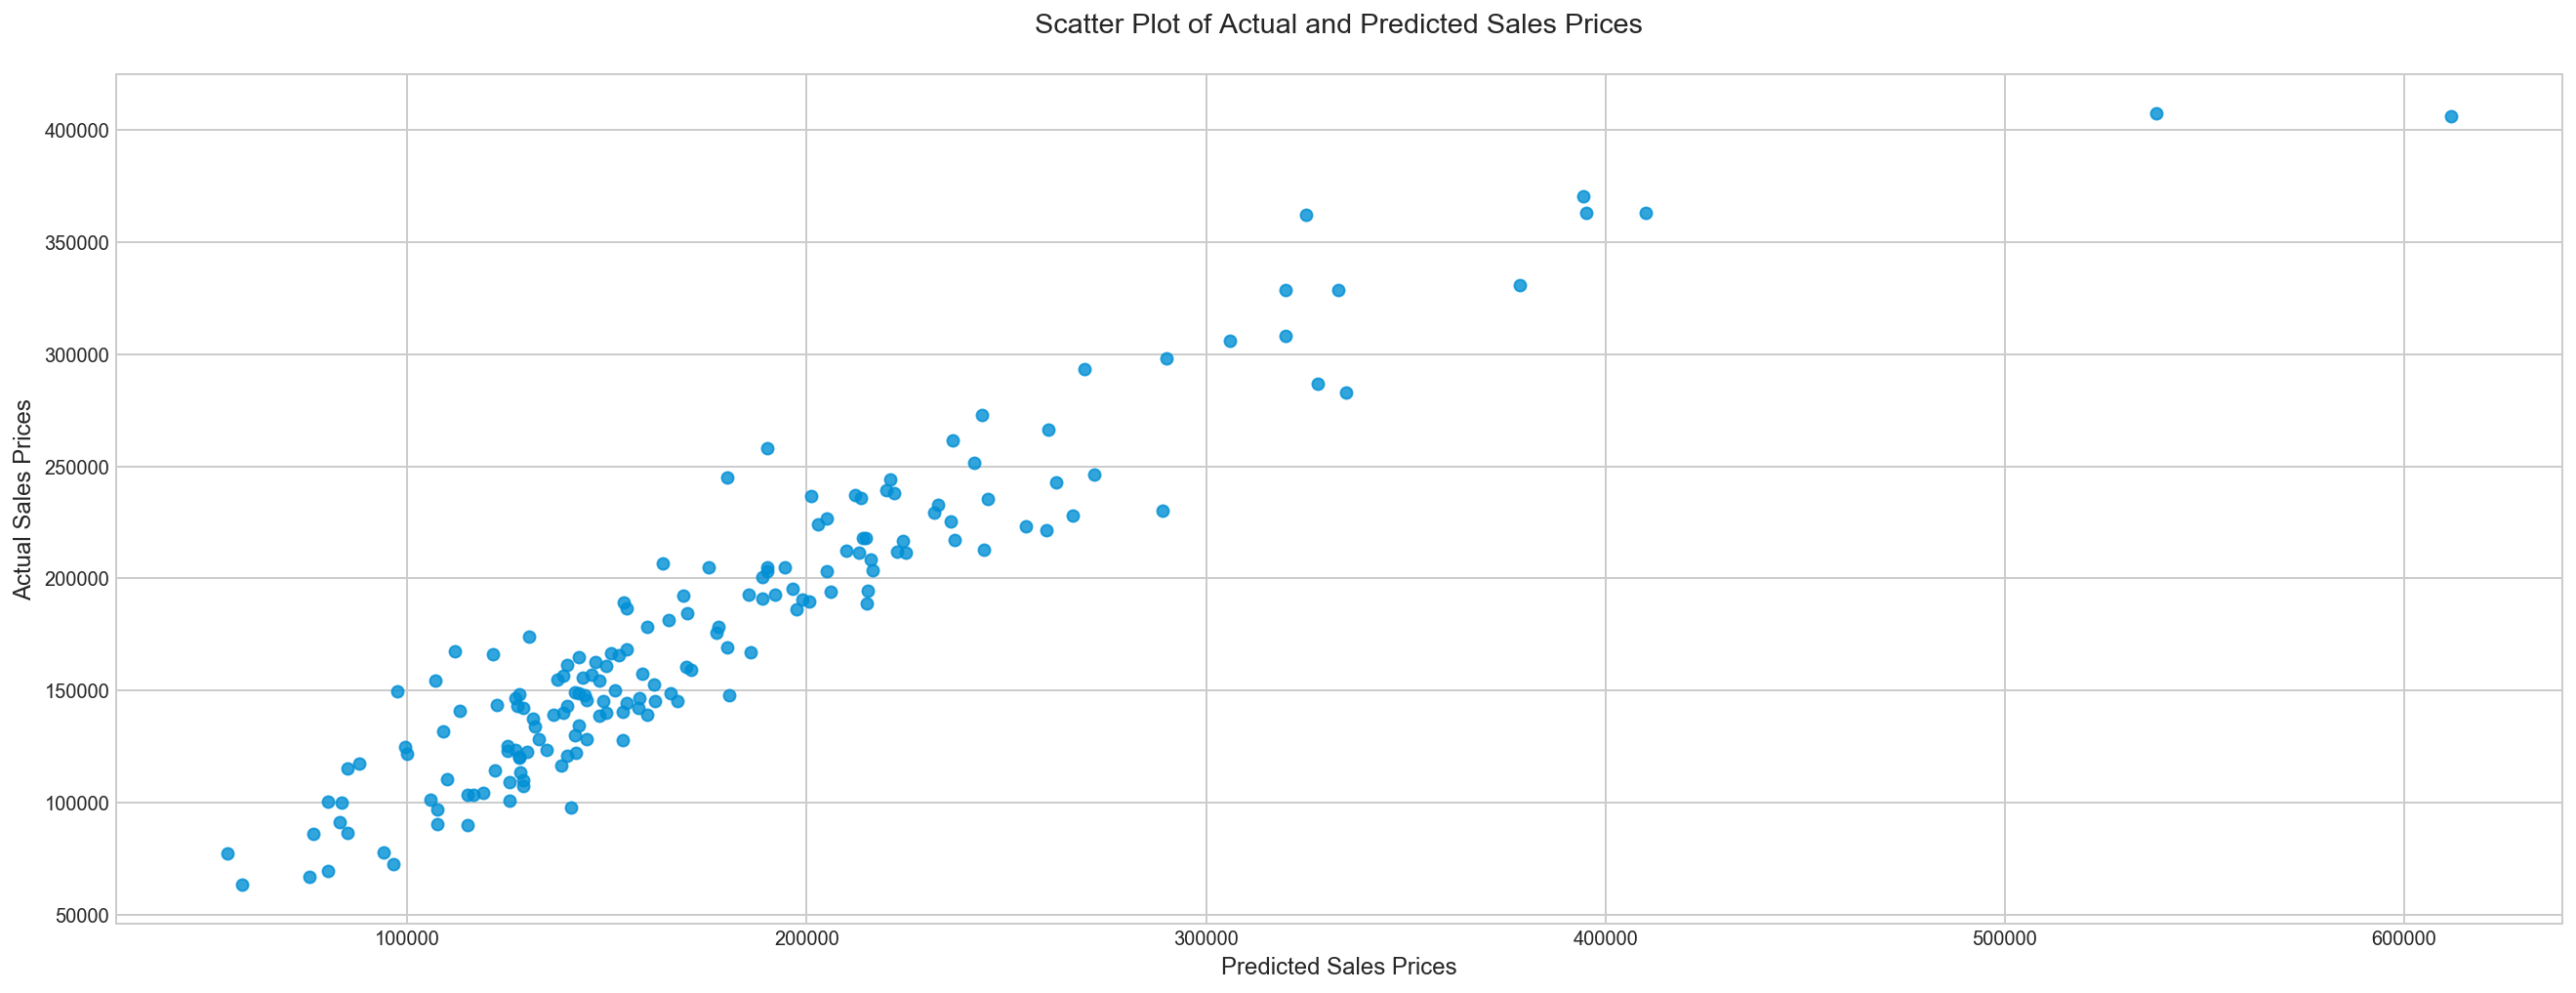

In [323]:
# sactter plot of actual vs predicted
# linear
plt.figure(figsize=(20,8))

sns.regplot(x=y_test, y=pred_lasso, fit_reg=False)

plt.title('Scatter Plot of Actual and Predicted Sales Prices\n')
plt.xlabel('Predicted Sales Prices')
plt.ylabel('Actual Sales Prices')
plt.show()

In [ ]:
# # Plot the Actual and Predicted Sales Prices on top of one another

# plt.figure(figsize=(20,8))

# plt.scatter(range(1,166), y_test,  color='black', label='Actual Prices') # The real sales prices from our test data
# plt.scatter(range(1,166), lr_yhat, color='red', alpha=0.5, label='Predicted Prices') # The predicted prices

# plt.legend(loc='upper left')

# plt.title('Comparison of Actual and Predicted Sales Prices\n')
# plt.xlabel('Houses Sold')
# plt.ylabel('Sale Prices')
# plt.show()

# print('Mean squared error: {}'.format(mean_squared_error(y_test, lr_yhat)))
# print('R^2: {}'.format(lr.score(X_test,y_test)))

In [ ]:
# # Plot the residuals to check if a linear model is a good model 
# # We are looking for a 'scattered' plot with random distribution of residual values

# plt.figure(figsize=(20,8))

# plt.scatter(range(1,166), (y_test-lr_yhat),  color='steelblue') 
# plt.axhline(y=0, color='red', linestyle='dashed') # red line across the centre for visual effect

# plt.title('Residuals\n')
# plt.xlabel('Points')
# plt.ylabel('Residual values')
# plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [325]:
house2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 82 columns):
Id               1450 non-null int64
MSSubClass       1450 non-null int64
MSZoning         1450 non-null object
LotFrontage      1191 non-null float64
LotArea          1450 non-null int64
Street           1450 non-null object
Alley            89 non-null object
LotShape         1450 non-null object
LandContour      1450 non-null object
Utilities        1450 non-null object
LotConfig        1450 non-null object
LandSlope        1450 non-null object
Neighborhood     1450 non-null object
Condition1       1450 non-null object
Condition2       1450 non-null object
BldgType         1450 non-null object
HouseStyle       1450 non-null object
OverallQual      1450 non-null int64
OverallCond      1450 non-null int64
YearBuilt        1450 non-null int64
YearRemodAdd     1450 non-null int64
RoofStyle        1450 non-null object
RoofMatl         1450 non-null object
Exterior1st      1450 non-n

In [371]:
renoft = house2[['Utilities','OverallQual', 'OverallCond','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 
                       'Foundation', 'BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating', 'HeatingQC','CentralAir', 'Electrical', 'BedroomAbvGr', 
                       'KitchenAbvGr', 'KitchenQual','TotRmsAbvGrd','Functional','FireplaceQu','GarageFinish','GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 
                       'Fence', 'SalePrice', 'YrSold']].copy()

In [373]:
target = target = renoft[["YrSold","SalePrice"]]
predictor = renoft.drop("SalePrice", axis=1)
cat_f =[i for i in predictor.columns.values if predictor[i].dtype == "object"]
for cat in cat_f:
    one_hot = pd.get_dummies(predictor[cat], prefix=cat)
    predictor = predictor.drop(cat, axis=1)
    predictor = pd.concat([predictor, one_hot], axis =1)

predictor = predictor.fillna(-1)

#Using years to split target and train variables
from sklearn.model_selection import train_test_split
X_test = predictor.loc[predictor['YrSold'] == 2010] 
X_train = predictor.loc[predictor['YrSold'] != 2010]
y_ptest = target.loc[target['YrSold'] == 2010]
y_ptrain = target.loc[target['YrSold'] != 2010]
y_test = y_ptest.SalePrice
y_train = y_ptrain.SalePrice

# trasnsform renovatable features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_2 = sc.fit_transform(X_train)
X_test_2 = sc.transform(X_test)

ridge_alphas = np.logspace(0, 5, 200)

ridgeReg_2 = RidgeCV(alphas=ridge_alphas, cv=10)
ridgeReg_2.fit(X_train_2, y_train)
pred_ridge = ridgeReg.predict(X_test_2)
#mean squared error
mse_reno = np.mean((pred_ridge - y_test)**2)
rescore_reno = ridgeReg.score(X_test_2,y_test)
print rescore_renp
print mse_reno
print (ridgeReg.alpha_)

ValueError: shapes (172,149) and (289,) not aligned: 149 (dim 1) != 289 (dim 0)

In [368]:
ridgecoeff_reno = pd.DataFrame({'variable':X_test.columns,
                            'coef':lalpha.coef_,
                           })

lassocoeff_3.sort_values('coef', inplace=True, ascending=False)
lassocoeff_3.head(30)

,coef,variable
0,27461.073446,OverallQual
4,20481.625908,TotRmsAbvGrd
110,8357.001371,KitchenQual_Ex
77,8144.204739,BsmtExposure_Gd
57,6002.813359,ExterQual_Ex
21,5686.476221,RoofMatl_WdShngl
142,5387.292514,PoolQC_Ex
125,3951.496224,FireplaceQu_TA
98,3578.446990,HeatingQC_Ex
123,3535.270336,FireplaceQu_Gd


In [363]:
X_test.groupby(columns)['SalePrice'].median()

NameError: name 'columns' is not defined

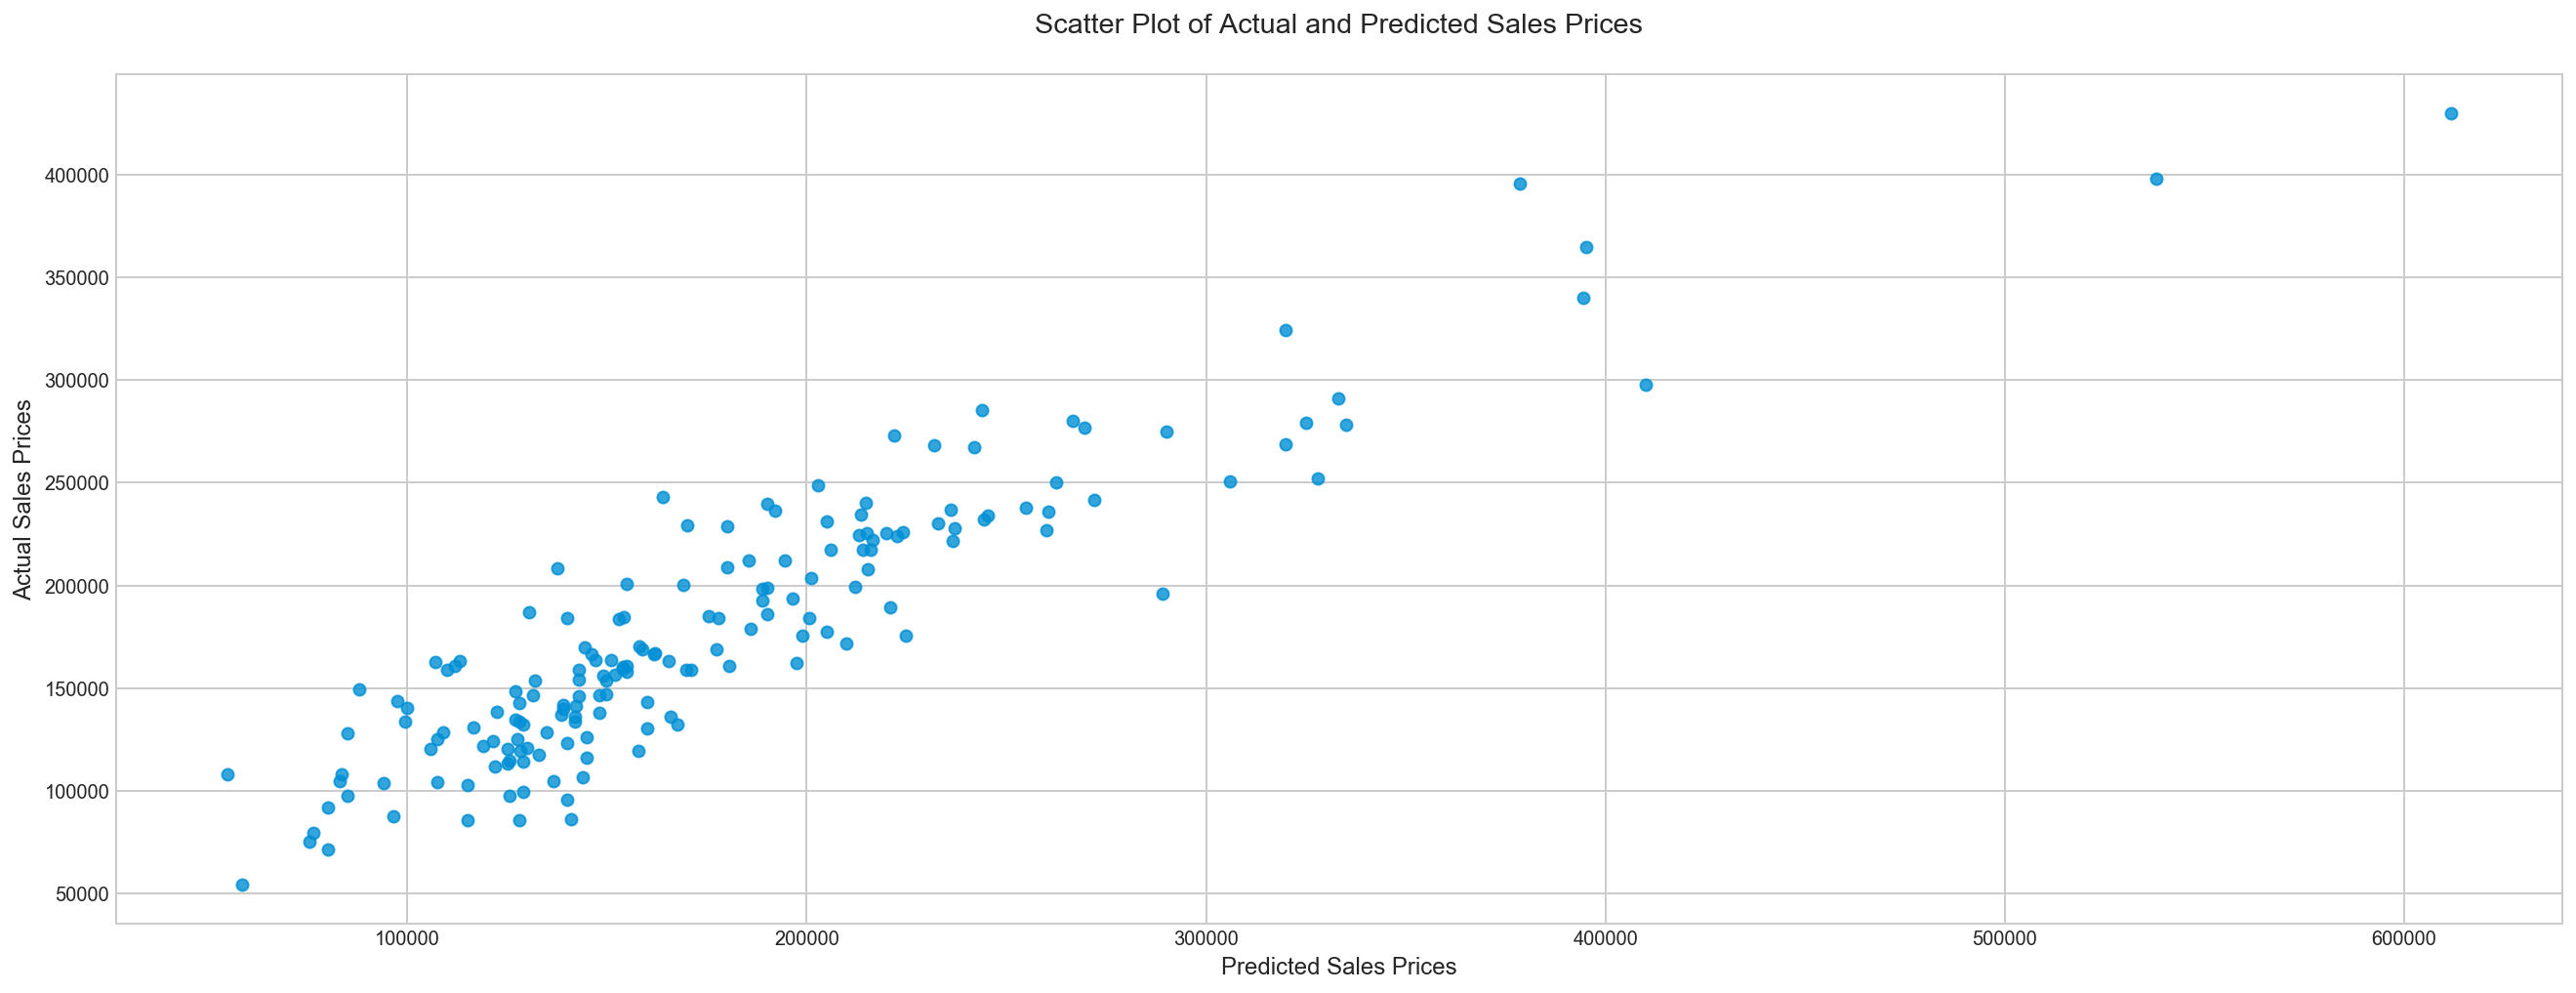

In [357]:
plt.figure(figsize=(20,8))

sns.regplot(x=y_test, y=pred_lasso_reno, fit_reg=False)

plt.title('Scatter Plot of Actual and Predicted Sales Prices\n')
plt.xlabel('Predicted Sales Prices')
plt.ylabel('Actual Sales Prices')
plt.show()

In [ ]:
plt.figure(figsize=(20,8))

sns.regplot(x=y_test, y=pred_lasso_reno, fit_reg=False)

plt.title('Scatter Plot of Actual and Predicted Sales Prices\n')
plt.xlabel('Predicted Sales Prices')
plt.ylabel('Actual Sales Prices')
plt.show()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.33)
# X_train.shape

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
"Accuracy:" + format(classifier.score(X_test, y_test))

In [ ]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 9)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print accuracy_score(y_test, pred)

In [ ]:
# y = admit.admit.values
# X = admit[['gpa']].values

# logreg = LogisticRegression()
# logreg.fit(X, y)

# print 'Logreg intercept:', logreg.intercept_
# print 'Logreg coef(s):', logreg.coef_
# print 'Logreg predicted probabilities:', logreg.predict_proba(X[0:5,:])

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [ ]:
# A:
house2.SaleCondition.value_counts()

In [ ]:
abnormal = house2[house2['SaleCondition'] == "Abnorml"].copy()
abnormal.reset_index(drop=True, inplace=True)
abnormal.head(50)

In [ ]:
abnormal.info()

In [ ]:
# sane = dflafin.groupby(dflafin.Neighborhood)['SalePrice'].mean

In [ ]:
house2[house2.FullBath==0].BsmtFullBath

In [ ]:
abnormal.loc[abnormal['Alley'] != "NaN"]

In [ ]:
abnormal.Alley